In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
original_stereo = pd.read_csv('~/Desktop/485/Data/predoc_toys_w_gender_label.csv')
original_stereo

,Gender,item
0,BOY,vehicle toys
1,BOY,sport
2,BOY,military toys
3,BOY,race cars
4,BOY,outer space toys
...,...,...
170,NEUTRAL,scooter
171,NEUTRAL,drum set
172,NEUTRAL,puzzles
173,NEUTRAL,board games


In [13]:
original_items = original_stereo['item'].unique()

In [14]:
original_stereo

,Gender,item
0,BOY,vehicle toys
1,BOY,sport
2,BOY,military toys
3,BOY,race cars
4,BOY,outer space toys
...,...,...
170,NEUTRAL,scooter
171,NEUTRAL,drum set
172,NEUTRAL,puzzles
173,NEUTRAL,board games


In [19]:
df = pd.read_csv('~/Desktop/485/Code/query_suggestion/az_uk_query_suggestions.csv')
df

,platform,query,suggestions
0,Amazon,vehicle toys,"['vehicle toys', 'vehicle toys for boys 3-5 ye..."
1,Amazon,sport,"['sports bras for women', 'sports bra', 'sport..."
2,Amazon,military toys,"['military toys', 'military toys for boys age ..."
3,Amazon,race cars,"['race cars', 'race cars for kids ages 3-5', '..."
4,Amazon,outer space toys,"['outer space toys', 'outer space toys for kid..."
...,...,...,...
261,Amazon_UK,playhouses,"['playhouses', 'playhouses for kids outdoor', ..."
262,Amazon_UK,princess sword,"['princess sword', 'princess sword and shield'..."
263,Amazon_UK,doctors kit,"['doctors kit', 'doctors kit for 3 year old', ..."
264,Amazon_UK,skin care kit,"['skin care kit', 'skin care kit for teen girl..."


In [16]:
stereo_toys = pd.read_csv('~/Desktop/485/Data/predoc_stereotyped_items.csv', delimiter =',')
stereo_toys

,BOY,GIRL,NEUTRAL
0,vehicle toys,doll,toy animals
1,sport,domestic toys,books
2,military toys,educational art,educational teaching
3,race cars,clothes,musical games
4,outer space toys,dollhouses,games
...,...,...,...
67,toy rocket,barbie furniture set,NaN
68,soccer ball,NaN,NaN
69,blue ipad,pink ipad,NaN
70,toy robots,NaN,NaN


In [17]:
df = df[df['platform'].isin(['Amazon', 'Target'])]
df

,platform,query,suggestions
0,Amazon,vehicle toys,"['vehicle toys', 'vehicle toys for boys 3-5 ye..."
1,Amazon,sport,"['sports bras for women', 'sports bra', 'sport..."
2,Amazon,military toys,"['military toys', 'military toys for boys age ..."
3,Amazon,race cars,"['race cars', 'race cars for kids ages 3-5', '..."
4,Amazon,outer space toys,"['outer space toys', 'outer space toys for kid..."
...,...,...,...
128,Amazon,playhouses,"['playhouses', 'playhouses for kids outdoor', ..."
129,Amazon,princess sword,"['princess sword', 'princess sword and shield'..."
130,Amazon,doctors kit,"['doctors kit', 'doctors kit for 3 year old', ..."
131,Amazon,skin care kit,"['skin care kit', 'skin care kit for teen girl..."


In [20]:
set(df['query'].unique()).difference(set(original_stereo['item'].unique()))

{'baby dolls', 'barbie', 'playhouses', 'soldier toys', 'toy vehicles'}

In [21]:
total = df['query'].nunique()
total

133

In [13]:
#df.to_csv('query_sugg_all_plat.csv', index=False)

In [22]:
def gender_association_measure(suggestions):
    gender = {'girl':0, 'boy': 0}
    if len(suggestions)<=2:
        return "no suggestion"
    suggestion_list = suggestions.split(',')
    for suggestion in suggestion_list:
        if 'girl' in suggestion:
                gender['girl'] += 1
        if 'boy' in suggestion:
            gender['boy'] += 1
    return gender

In [23]:
df['gender_association'] = df['suggestions'].apply(lambda x: gender_association_measure(x))
df

,platform,query,suggestions,gender_association
0,Amazon,vehicle toys,"['vehicle toys', 'vehicle toys for boys 3-5 ye...","{'girl': 0, 'boy': 6}"
1,Amazon,sport,"['sports bras for women', 'sports bra', 'sport...","{'girl': 0, 'boy': 1}"
2,Amazon,military toys,"['military toys', 'military toys for boys age ...","{'girl': 0, 'boy': 6}"
3,Amazon,race cars,"['race cars', 'race cars for kids ages 3-5', '...","{'girl': 0, 'boy': 4}"
4,Amazon,outer space toys,"['outer space toys', 'outer space toys for kid...","{'girl': 0, 'boy': 1}"
...,...,...,...,...
261,Amazon_UK,playhouses,"['playhouses', 'playhouses for kids outdoor', ...","{'girl': 1, 'boy': 1}"
262,Amazon_UK,princess sword,"['princess sword', 'princess sword and shield'...","{'girl': 1, 'boy': 0}"
263,Amazon_UK,doctors kit,"['doctors kit', 'doctors kit for 3 year old', ...","{'girl': 1, 'boy': 0}"
264,Amazon_UK,skin care kit,"['skin care kit', 'skin care kit for teen girl...","{'girl': 3, 'boy': 0}"


In [24]:
def gender_annotate(gender_assoc_dict):
    try:
        if gender_assoc_dict['girl'] > gender_assoc_dict['boy']:
            return 'girl'
        elif gender_assoc_dict['girl'] == gender_assoc_dict['boy']:
            return 'neutral'
        else:
            return 'boy'
    except:
        return

In [25]:
df['gender'] = df['gender_association'].apply(lambda x: gender_annotate(x))
df

,platform,query,suggestions,gender_association,gender
0,Amazon,vehicle toys,"['vehicle toys', 'vehicle toys for boys 3-5 ye...","{'girl': 0, 'boy': 6}",boy
1,Amazon,sport,"['sports bras for women', 'sports bra', 'sport...","{'girl': 0, 'boy': 1}",boy
2,Amazon,military toys,"['military toys', 'military toys for boys age ...","{'girl': 0, 'boy': 6}",boy
3,Amazon,race cars,"['race cars', 'race cars for kids ages 3-5', '...","{'girl': 0, 'boy': 4}",boy
4,Amazon,outer space toys,"['outer space toys', 'outer space toys for kid...","{'girl': 0, 'boy': 1}",boy
...,...,...,...,...,...
261,Amazon_UK,playhouses,"['playhouses', 'playhouses for kids outdoor', ...","{'girl': 1, 'boy': 1}",neutral
262,Amazon_UK,princess sword,"['princess sword', 'princess sword and shield'...","{'girl': 1, 'boy': 0}",girl
263,Amazon_UK,doctors kit,"['doctors kit', 'doctors kit for 3 year old', ...","{'girl': 1, 'boy': 0}",girl
264,Amazon_UK,skin care kit,"['skin care kit', 'skin care kit for teen girl...","{'girl': 3, 'boy': 0}",girl


In [26]:
df[df['gender'].isna()]

,platform,query,suggestions,gender_association,gender
19,Amazon,volcano creator,[],no suggestion,None
152,Amazon_UK,volcano creator,[],no suggestion,None


In [27]:
df.dropna(inplace = True)

In [16]:
#az_rand_num = az_rand.replace({'gender':{'boy':1, 'neutral':0, 'girl':-1}, 'Gender':{'BOY':1, 'NEUTRAL':0, 'GIRL':-1}})

### Match with actual list

## sys generated label

In [28]:
df.groupby('gender')['query'].count()

gender
boy         80
girl        78
neutral    106
Name: query, dtype: int64

In [29]:
rand_df = df[['platform', 'query','gender']]
rand_df = rand_df.reset_index(drop=True)

In [30]:
rand_df.groupby('gender')['query'].count()

gender
boy         80
girl        78
neutral    106
Name: query, dtype: int64

In [31]:
generated_list = rand_df.groupby(['platform', 'gender'])['query'].apply(list)
generated_list

platform   gender 
Amazon     boy        [vehicle toys, sport, military toys, race cars...
           girl       [castle tent, building blocks, doll, dollhouse...
           neutral    [depots, machines, doll-humanoid, gi joe actio...
Amazon_UK  boy        [vehicle toys, sport, military toys, race cars...
           girl       [castle tent, building blocks, doll, dollhouse...
           neutral    [depots, machines, doll-humanoid, gi joe actio...
Name: query, dtype: object

In [32]:
list_item = generated_list.to_frame().reset_index()
list_item

,platform,gender,query
0,Amazon,boy,"[vehicle toys, sport, military toys, race cars..."
1,Amazon,girl,"[castle tent, building blocks, doll, dollhouse..."
2,Amazon,neutral,"[depots, machines, doll-humanoid, gi joe actio..."
3,Amazon_UK,boy,"[vehicle toys, sport, military toys, race cars..."
4,Amazon_UK,girl,"[castle tent, building blocks, doll, dollhouse..."
5,Amazon_UK,neutral,"[depots, machines, doll-humanoid, gi joe actio..."


In [35]:
def match(row, gender_col, original_df):
    if row[gender_col] == 'boy':
        toys = list(original_df['BOY'].values)
    elif row[gender_col] == 'girl':
        toys = list(original_df['GIRL'].values)
    else:
        return
    union = len(row['query'])+len(toys)
    matched_items = set(row['query']).intersection(set(toys))
    return round(len(matched_items)/union,2)

In [36]:
list_item['count_match'] = list_item.apply(lambda x: match(x, 'gender',stereo_toys), axis = 1)
#list_df['frac_match'] = list_df['count_match']/list_df['total_item']
list_item

,platform,gender,query,count_match
0,Amazon,boy,"[vehicle toys, sport, military toys, race cars...",0.34
1,Amazon,girl,"[castle tent, building blocks, doll, dollhouse...",0.33
2,Amazon,neutral,"[depots, machines, doll-humanoid, gi joe actio...",NaN
3,Amazon_UK,boy,"[vehicle toys, sport, military toys, race cars...",0.34
4,Amazon_UK,girl,"[castle tent, building blocks, doll, dollhouse...",0.33
5,Amazon_UK,neutral,"[depots, machines, doll-humanoid, gi joe actio...",NaN


## Randomize

In [26]:
def permutation(r_df, iteration, stereo_toys):
    #for i in range(10000):
    sys_label = r_df['gender'].values
    np.random.shuffle(sys_label)
    r_df['rand_gender'] = sys_label
    generated_list = r_df.groupby(['rand_gender'])['item'].apply(list)
    list_df = generated_list.to_frame().reset_index()
    list_df['jaccard_sim'] = list_df.apply(lambda x: match(x, 'rand_gender',stereo_toys), axis = 1)
    list_df['iteration'] = iteration
    list_df.drop(columns=['item'], inplace=True)
    list_df.dropna(inplace=True)
    return list_df

In [25]:
result_pval = pd.DataFrame()
for i in range(100000):
    result = rand_df.groupby('platform').apply(lambda x: permutation(x, i, stereo_toys))
    result = result.reset_index('platform')
    result_pval = result_pval.append(result, ignore_index = True)

In [26]:
result_pval

,platform,rand_gender,jaccard_sim,iteration
0,Amazon,boy,0.12,0
1,Amazon,girl,0.16,0
2,Target,boy,0.10,0
3,Target,girl,0.14,0
4,Amazon,boy,0.13,1
...,...,...,...,...
399995,Target,girl,0.12,99998
399996,Amazon,boy,0.14,99999
399997,Amazon,girl,0.17,99999
399998,Target,boy,0.12,99999


In [27]:
plot_pval = result_pval.groupby(['platform', 'rand_gender', 'jaccard_sim'])['iteration'].count()
plot_pval = plot_pval.reset_index()
plot_pval

,platform,rand_gender,jaccard_sim,iteration
0,Amazon,boy,0.06,2
1,Amazon,boy,0.07,5
2,Amazon,boy,0.08,120
3,Amazon,boy,0.09,300
4,Amazon,boy,0.10,771
...,...,...,...,...
77,Target,girl,0.16,1325
78,Target,girl,0.17,457
79,Target,girl,0.18,124
80,Target,girl,0.19,32


In [226]:
def p_val_calc(sys_sim, random_sim, niteration, col_gender):
    gender = sys_sim['gender'].values[0]
    if gender == 'neutral':
        return
    platform = sys_sim['platform'].values[0]
    original_sim = sys_sim['count_match'].values[0]
    #print(sys_sim)
    random_plat_sim = random_sim[(random_sim[col_gender]==gender) & (random_sim['platform']==platform)]
    random_plat_sim = random_plat_sim[random_plat_sim['jaccard_sim']>=original_sim]
    #print(random_plat_sim)
    total = random_plat_sim['iteration'].sum()
    frac = total/niteration
    return frac

In [29]:
p_val = list_item.groupby(['platform','gender']).apply(lambda x: p_val_calc(x, plot_pval, 100000))
p_val = p_val.reset_index()
p_val.dropna(inplace=True)
p_val

,platform,gender,0
0,Amazon,boy,0.00000
1,Amazon,girl,0.00000
3,Target,boy,0.00033
4,Target,girl,0.00000


<AxesSubplot:xlabel='jaccard_sim'>

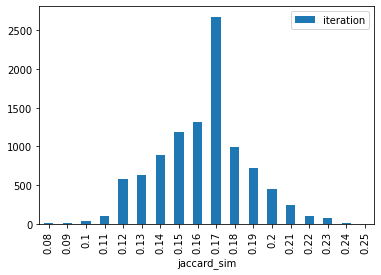

In [28]:
import matplotlib.pyplot as plt
az = plot_pval[(plot_pval['platform']=='Amazon') & (plot_pval['rand_gender']=='boy')]
az.plot.bar(x='jaccard_sim', y='iteration')

In [29]:
list_item.dropna()

,platform,gender,item,count_match
0,Amazon,boy,"[sport, toy robots, toy rocket, monster trucks...",0.31
1,Amazon,girl,"[ballerina costume, building blocks, clothes, ...",0.34
3,Target,boy,"[toy robots, clothes, monster trucks, sword to...",0.21
4,Target,girl,"[machine, building blocks, tiara, baby doll, m...",0.20


In [133]:
df

,platform,query,suggestions,item,gender_association,gender
1,Amazon,ballerina costume for,"['ballerina costume for girls 4-6', 'ballerina...",ballerina costume,"{'girl': 8, 'boy': 0}",girl
3,Target,ballerina costume for,"['ballerina costume', 'ballerina doll', 'balle...",ballerina costume,"{'girl': 0, 'boy': 0}",neutral
10,Amazon,sport for,"['sport formula multivitamin', 'sport formula ...",sport,"{'girl': 0, 'boy': 1}",boy
12,Target,sport for,"['sport for boy', 'sport for toddlers', 'sport...",sport,"{'girl': 1, 'boy': 1}",neutral
19,Amazon,machine for,"['machine for nails', 'machine for nails', 'ma...",machine,"{'girl': 0, 'boy': 0}",neutral
...,...,...,...,...,...,...
1311,Target,crayons for,"['crayola crayons for toddlers', 'crayons for ...",crayons,"{'girl': 0, 'boy': 0}",neutral
1314,Amazon,space station for,"['space station for kids', 'space station for ...",space station,"{'girl': 0, 'boy': 1}",boy
1316,Target,space station for,"['play space station tent', 'fao schwarz play ...",space station,"{'girl': 0, 'boy': 0}",neutral
1319,Amazon,toy soldiers for,"['toy soldiers for boys', 'toy soldiers for bo...",toy soldiers,"{'girl': 1, 'boy': 4}",boy


## Randomize platforms

In [213]:
rand_plat_df = df[['platform', 'item', 'gender']].reset_index(drop=True)
rand_plat_df

,platform,item,gender
0,Amazon,ballerina costume,girl
1,Target,ballerina costume,neutral
2,Amazon,sport,boy
3,Target,sport,neutral
4,Amazon,machine,neutral
...,...,...,...
329,Target,crayons,neutral
330,Amazon,space station,boy
331,Target,space station,neutral
332,Amazon,toy soldiers,boy


In [238]:
import random
def swap(row):
    coin = random.randint(0, 1)
    if coin == 0:
        return row
    else:
        idx = pd.Index(row.index).values
        b, c = row.loc[idx[0]]['gender'], row.loc[idx[1]]['gender']
        temp = row.loc[idx[0]]['gender']
        row.loc[idx[0]]['gender'] = c
        row.loc[idx[1]]['gender'] = temp
    return row

In [239]:
def rand_plat(r_df, iteration, stereo_toys):
    #for i in range(10000):
    #sys_label = r_df['gender'].values
    #np.random.shuffle(sys_label)
    #r_df['rand_gender'] = sys_label
    generated_list = r_df.groupby(['gender'])['item'].apply(list)
    list_df = generated_list.to_frame().reset_index()
    list_df['jaccard_sim'] = list_df.apply(lambda x: match(x, 'gender',stereo_toys), axis = 1)
    list_df['iteration'] = iteration
    list_df.drop(columns=['item'], inplace=True)
    list_df.dropna(inplace=True)
    return list_df

In [240]:
rand_result_pval = pd.DataFrame()
for i in range(100000):
    rand_df = rand_plat_df.groupby('item').apply(lambda x: swap(x))
    rand_df.dropna(inplace=True)
    rand_result = rand_df.groupby('platform').apply(lambda x: rand_plat(x, i, stereo_toys))
    rand_result = rand_result.reset_index('platform')
    rand_result_pval = rand_result_pval.append(rand_result, ignore_index = True)

In [28]:
#rand_result_pval.to_csv('rand_plat.csv', index = False)
rand_result_pval = pd.read_csv('rand_plat.csv')
rand_result_pval

,platform,gender,jaccard_sim,iteration
0,Amazon,boy,0.26,0
1,Amazon,girl,0.28,0
2,Target,boy,0.26,0
3,Target,girl,0.28,0
4,Amazon,boy,0.27,1
...,...,...,...,...
399995,Target,girl,0.29,99998
399996,Amazon,boy,0.25,99999
399997,Amazon,girl,0.27,99999
399998,Target,boy,0.27,99999


In [32]:
def difference(row):
    val = abs(row['jaccard_sim'].diff().values[1])
    return round(val,2)

In [33]:
diff_pa_val = rand_result_pval.groupby(['gender','iteration']).apply(lambda x: difference(x))
diff_pa_val = diff_pa_val.reset_index()
diff_pa_val

,gender,iteration,0
0,boy,0,0.00
1,boy,1,0.02
2,boy,2,0.02
3,boy,3,0.02
4,boy,4,0.06
...,...,...,...
199995,girl,99995,0.00
199996,girl,99996,0.01
199997,girl,99997,0.01
199998,girl,99998,0.01


In [34]:
rand_plot_pval = diff_pa_val.groupby(['gender', 0])['iteration'].count()
rand_plot_pval = rand_plot_pval.reset_index()
rand_plot_pval

,gender,0,iteration
0,boy,0.00,15801
1,boy,0.01,10414
2,boy,0.02,35324
3,boy,0.03,4197
4,boy,0.04,18301
5,boy,0.05,4521
6,boy,0.06,6546
7,boy,0.07,2331
8,boy,0.08,1348
9,boy,0.09,822


In [35]:
list_item

,platform,gender,item,count_match
0,Amazon,boy,"[sport, toy robots, toy rocket, monster trucks...",0.31
1,Amazon,girl,"[ballerina costume, building blocks, clothes, ...",0.34
2,Amazon,neutral,"[machine, toy vacuum cleaner, sword toy, docto...",NaN
3,Target,boy,"[toy robots, clothes, monster trucks, sword to...",0.21
4,Target,girl,"[machine, building blocks, tiara, baby doll, m...",0.20
5,Target,neutral,"[ballerina costume, sport, toy rocket, toy vac...",NaN


In [36]:
def rand_p_val_calc(sys_sim, random_sim, niteration, col_gender):
    gender = sys_sim['gender'].values[0]
    if gender == 'neutral':
        return
    platform = sys_sim['platform'].values[0]
    original_diff = abs(sys_sim['count_match'].diff().values[1])
    #print(sys_sim)
    random_plat_sim = random_sim[random_sim[col_gender]==gender]
    random_plat_sim = random_plat_sim[random_plat_sim[0]>=original_diff]
    #print(random_plat_sim)
    total = random_plat_sim['iteration'].sum()
    frac = total/niteration
    return frac

In [37]:
rand_p_val = list_item.groupby(['gender']).apply(lambda x: rand_p_val_calc(x, rand_plot_pval, 100000, 'gender'))
rand_p_val = rand_p_val.reset_index()
rand_p_val.dropna(inplace=True)
rand_p_val

,gender,0
0,boy,0.00395
1,girl,0.00002


<AxesSubplot:xlabel='jaccard_sim'>

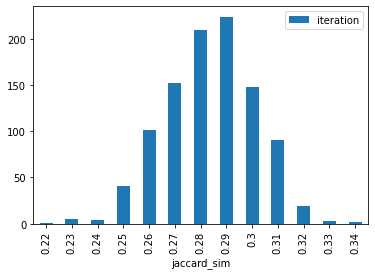

In [237]:
import matplotlib.pyplot as plt
az = rand_plot_pval[(rand_plot_pval['platform']=='Target') & (rand_plot_pval['gender']=='girl')]
az.plot.bar(x='jaccard_sim', y='iteration')

### item gender for each item

In [30]:
df

,platform,query,suggestions,item,gender_association,gender
1,Amazon,ballerina costume for,"['ballerina costume for girls 4-6', 'ballerina...",ballerina costume,"{'girl': 8, 'boy': 0}",girl
3,Target,ballerina costume for,"['ballerina costume', 'ballerina doll', 'balle...",ballerina costume,"{'girl': 0, 'boy': 0}",neutral
10,Amazon,sport for,"['sport formula multivitamin', 'sport formula ...",sport,"{'girl': 0, 'boy': 1}",boy
12,Target,sport for,"['sport for boy', 'sport for toddlers', 'sport...",sport,"{'girl': 1, 'boy': 1}",neutral
19,Amazon,machine for,"['machine for nails', 'machine for nails', 'ma...",machine,"{'girl': 0, 'boy': 0}",neutral
...,...,...,...,...,...,...
1311,Target,crayons for,"['crayola crayons for toddlers', 'crayons for ...",crayons,"{'girl': 0, 'boy': 0}",neutral
1314,Amazon,space station for,"['space station for kids', 'space station for ...",space station,"{'girl': 0, 'boy': 1}",boy
1316,Target,space station for,"['play space station tent', 'fao schwarz play ...",space station,"{'girl': 0, 'boy': 0}",neutral
1319,Amazon,toy soldiers for,"['toy soldiers for boys', 'toy soldiers for bo...",toy soldiers,"{'girl': 1, 'boy': 4}",boy


In [31]:
new_df = df[['platform', 'item', 'gender_association']]

In [32]:
new_df = pd.concat([new_df.drop(['gender_association'], axis=1), new_df['gender_association'].apply(pd.Series)], axis=1)

In [34]:
#new_df.drop(columns=[0], inplace = True)
#new_df = new_df.dropna()
#new_df

In [35]:
g = new_df.groupby(['item'])['boy'].mean()
g = g.reset_index()
g

,item,boy
0,action figure,3.0
1,action figures,3.5
2,airport toy,0.0
3,baby doll,1.0
4,baby doll stroller,1.5
...,...,...
161,war toys,3.5
162,winnie the pooh,1.5
163,wood blocks,0.0
164,woody valentine,0.0


In [36]:
g['girl'] = new_df.groupby(['item'])['girl'].mean().values
g

,item,boy,girl
0,action figure,3.0,0.5
1,action figures,3.5,1.0
2,airport toy,0.0,0.5
3,baby doll,1.0,4.5
4,baby doll stroller,1.5,4.0
...,...,...,...
161,war toys,3.5,0.0
162,winnie the pooh,1.5,0.5
163,wood blocks,0.0,0.0
164,woody valentine,0.0,0.0


In [37]:
g['diff'] = g['boy']-g['girl']
g

,item,boy,girl,diff
0,action figure,3.0,0.5,2.5
1,action figures,3.5,1.0,2.5
2,airport toy,0.0,0.5,-0.5
3,baby doll,1.0,4.5,-3.5
4,baby doll stroller,1.5,4.0,-2.5
...,...,...,...,...
161,war toys,3.5,0.0,3.5
162,winnie the pooh,1.5,0.5,1.0
163,wood blocks,0.0,0.0,0.0
164,woody valentine,0.0,0.0,0.0


In [38]:
s = g.sort_values('diff', ascending=False).head(40)
s

,item,boy,girl,diff
87,military toys,5.0,0.0,5.0
32,construction toys,5.0,0.0,5.0
92,monster trucks,5.0,0.5,4.5
77,lego cars,4.0,0.0,4.0
13,batman costume,4.0,0.0,4.0
115,racetrack,4.5,0.5,4.0
161,war toys,3.5,0.0,3.5
79,legos,5.5,2.5,3.0
128,spiderman,4.0,1.0,3.0
1,action figures,3.5,1.0,2.5


In [39]:
test_df = stereo_toys.T
test_df['item'] = test_df.values.tolist()
new_df = test_df[['item']]
new_df.reset_index(inplace=True)
new_df.rename(columns={'index':'gender'},inplace=True)
#new_df = new_df.explode('item')
#new_df

/home/amifaraj/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
def gender_score(row):
    if row == 'BOY':
        return 1
    elif row == 'GIRL':
        return -1
    else:
        return 0

In [41]:
new_df = new_df.explode('item')
new_df['gender_score'] = new_df['gender'].apply(lambda x: gender_score(x))
new_df

,gender,item,gender_score
0,BOY,vehicle toys,1
0,BOY,sport,1
0,BOY,military toys,1
0,BOY,race cars,1
0,BOY,outer space toys,1
...,...,...,...
2,NEUTRAL,NaN,0
2,NEUTRAL,NaN,0
2,NEUTRAL,NaN,0
2,NEUTRAL,NaN,0


In [42]:
merged_df = pd.merge(g[['item', 'diff', 'boy', 'girl']], new_df[['item', 'gender_score']], how = 'outer', on ='item')
merged_df.drop_duplicates(keep='last', inplace=True)
merged_df

,item,diff,boy,girl,gender_score
0,action figure,2.5,3.0,0.5,1
1,action figures,2.5,3.5,1.0,1
2,airport toy,-0.5,0.0,0.5,1
4,baby doll,-3.5,1.0,4.5,-1
6,baby doll stroller,-2.5,1.5,4.0,-1
...,...,...,...,...,...
172,woody valentine,0.0,0.0,0.0,1
173,wwe action figure,0.0,0.0,0.0,1
174,weather forecasting toy,NaN,NaN,NaN,1
179,NaN,NaN,NaN,NaN,-1


In [43]:
merged_df.sort_values(by='diff', ascending=True).head(45)

,item,diff,boy,girl,gender_score
111,play makeup,-6.50,0.0,6.50,-1
46,doll,-5.00,1.0,6.00,-1
119,princess costume,-4.50,0.0,4.50,-1
77,jewelry,-4.50,0.0,4.50,-1
162,vanity set,-4.50,0.0,4.50,-1
95,minnie mouse,-4.00,0.0,4.00,-1
36,craft toys,-4.00,1.0,5.00,-1
8,ballerina costume,-4.00,0.0,4.00,-1
10,barbie doll,-4.00,0.5,4.50,-1
89,makeup kit,-4.00,0.0,4.00,-1


In [39]:
#merged_df.isna().sum()

In [40]:
#split_df = pd.concat([merged_df.drop(['score'], axis=1), merged_df['score'].apply(pd.Series)], axis=1)

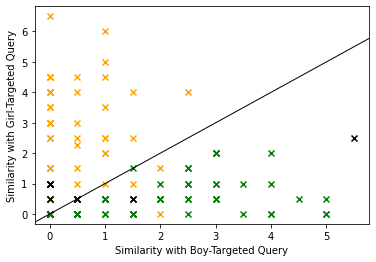

In [65]:
def addcolor(a):

    if a== 1:
        return 'green'
    elif a== 0: 
        return 'black'
    elif a==-1: 
        return'orange'
def addsign(a):

    if a== 1:
        return 'x'
    elif a== 0: 
        return '+'
    elif a== -1: 
        return'o'
    #return a

merged_df['color'] = merged_df['gender_score'].apply(lambda x: addcolor(x))
merged_df['sign'] = merged_df['gender_score'].apply(lambda x: addsign(x))
#print(merged_df)
#val = 0. # this is the value where you want the data to appear on the y-axis.
x = list(merged_df['boy'].values)
#y = np.zeros_like(x)+val
y = list(merged_df['girl'].values)
col = list(merged_df['color'].values)
mark = list(merged_df['sign'].values)
n = list(merged_df['item'].values)
#fig, ax = plt.subplots()

for i, val in enumerate(n):
    x1 = x[i]    
    y1 = y[i]
    c1 = col[i]
    m = mark[i]
    plt.scatter(x1, y1, marker='x', c=c1)

#ticks = [-1, 0, 1]
#labels = ['GIRL', 'NEUTRAL', 'BOY']
#plt.yticks(ticks, labels)
#ticks = [min(x), 0, max(x)]
#plt.xticks(ticks, labels)
xpoints = ypoints = plt.xlim()
#plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
#plt.show()
plt.plot(xpoints, ypoints, color='k', lw=1, scalex=False, scaley=False)


#plt.show()
plt.xlabel("Similarity with Boy-Targeted Query")
plt.ylabel("Similarity with Girl-Targeted Query")

plt.savefig('SIGIR_gender_asso_scatter.pdf')

#plt.scatter(x, y, marker = merged_df['sign'].values, c=merged_df['color'])

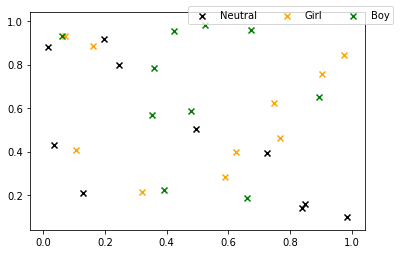

In [127]:
import matplotlib.pyplot as plt
from numpy.random import random

colors = ['black', 'orange', 'green',]

lo = plt.scatter(random(10), random(10), marker='x', color=colors[0])
ll = plt.scatter(random(10), random(10), marker='x', color=colors[1])
l  = plt.scatter(random(10), random(10), marker='x', color=colors[2])


plt.legend((lo, ll, l,),
           ('Neutral', 'Girl', 'Boy'),
           scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=10, bbox_to_anchor=(1.1, 1.05))
#ax.legend()

plt.show()

In [242]:
boy = list(g[g['diff']>0]['item'].values)
r_boy = list(stereo_toys['BOY'].values)
inter = len(set(boy).intersection(set(r_boy)))
recall_boy = inter/len(r_boy)
recall_boy

0.6081081081081081

In [243]:
girl = list(g[g['diff']<0]['item'].values)
r_girl = list(stereo_toys['GIRL'].values)
inter = len(set(girl).intersection(set(r_girl)))
recall_girl = inter/len(r_girl)
recall_girl

0.6351351351351351

In [271]:
g.sort_values(by=['diff'], ascending= False)[60:70]

,item,boy,girl,diff
197,wwf ring,0.166667,0.000000,0.166667
87,leappad,0.166667,0.000000,0.166667
135,remote control helicopter,0.714286,0.571429,0.142857
144,space station,0.142857,0.000000,0.142857
158,sword,0.285714,0.142857,0.142857
81,hockey stick,0.250000,0.125000,0.125000
74,gears,0.125000,0.000000,0.125000
72,games and puzzles,0.125000,0.000000,0.125000
107,musical instruments,0.111111,0.000000,0.111111
69,football,0.444444,0.333333,0.111111


In [223]:
#g.sort_values(['girl', 'boy'], ascending=[True, False]).head(30)

In [224]:
gender_count = df.groupby(['item', 'gender'])['platform'].count()
gender_count = gender_count.reset_index()
gender = gender_count.loc[gender_count.groupby('item')['platform'].idxmax()]
gender

,item,gender,platform
0,action figure,boy,5
3,action figures,boy,4
6,airport toy,neutral,5
7,arts and crafts,girl,5
10,baby doll,girl,3
...,...,...,...
401,wood blocks,neutral,8
402,woody valentine,neutral,3
403,wwe action figure,neutral,5
405,wwf ring,neutral,5


In [225]:
gender_list = gender.groupby('gender')['item'].apply(list)
gender_list

gender
boy        [action figure, action figures, batman costume...
girl       [arts and crafts, baby doll, baby dolls, bakin...
neutral    [airport toy, baby doll stroller, barbie doll,...
Name: item, dtype: object

In [227]:
gender_list['neutral']

['airport toy',
 'baby doll stroller',
 'barbie doll',
 'barbie furniture set',
 'barn',
 'basketball hoop',
 'beads',
 'beanie baby bear',
 'blue ipad',
 'board games',
 'books',
 'bratz doll',
 'broom',
 'bug collection set',
 'building blocks',
 'building games',
 'bus',
 'candy land',
 'castle tent',
 'crayons',
 'crochet kit',
 'crochet set',
 'cupcake maker',
 'depots',
 'dinosaur toy',
 'doctor kit',
 'doctors kit',
 'doll baby',
 'doll-humanoid',
 'dollhouse',
 'dollhouses',
 'domestic toys',
 'dragonballz',
 'drum set',
 'drums',
 'easy bake oven',
 'educational art',
 'educational material',
 'educational teaching',
 'elmo',
 'fashion dolls',
 'firefighter gear',
 'football',
 'furnishing',
 'games',
 'games and puzzles',
 'gardening tools',
 'gears',
 'gi joe action figure',
 'gi joe figue',
 'grill',
 'guitar',
 'harry potter books',
 'helicopter',
 'hockey stick',
 'hot wheels',
 'leappad',
 'lincoln logs',
 'live animals',
 'machine',
 'machines',
 'math flash card',
 'mi

In [162]:
gender_list['girl']

['arts and crafts',
 'baby doll',
 'baby dolls',
 'baking kit',
 'ballerina costume',
 'ballerina costumes',
 'barbie ',
 'barbie costume',
 'barbie jeep',
 'beauty products',
 'clothes',
 'computer games',
 'craft toys',
 'disney doll',
 'doll',
 'doll accessories',
 'dora doll',
 'dorothy costume',
 'fashion doll',
 'jewelry',
 'karaoke machine',
 'kitchen set ',
 'makeup',
 'makeup kit',
 'minnie mouse',
 'monster high costume',
 'pink cars',
 'pink ipad',
 'play makeup',
 'playhouses',
 'princess costume',
 'scooter',
 'sewing machine',
 'sparkly toys',
 'stuffed animals',
 'tea party set',
 'tea set',
 'tiara',
 'vanity set']

In [163]:
gender_list['neutral']

['airport toy',
 'baby doll stroller',
 'barbie doll',
 'barbie furniture set',
 'barn',
 'basketball hoop',
 'beads',
 'beanie baby bear',
 'blue ipad',
 'board games',
 'books',
 'bratz doll',
 'broom',
 'bug collection set',
 'building blocks',
 'building games',
 'bus',
 'candy land',
 'castle tent',
 'crayons',
 'crochet kit',
 'crochet set',
 'cupcake maker',
 'depots',
 'dinosaur toy',
 'doctor kit',
 'doctors kit',
 'doll baby',
 'doll-humanoid',
 'dollhouse',
 'dollhouses',
 'domestic toys',
 'dragonballz',
 'drum set',
 'drums',
 'easy bake oven',
 'educational art',
 'educational material',
 'educational teaching',
 'elmo',
 'fashion dolls',
 'firefighter gear',
 'football',
 'furnishing',
 'games',
 'games and puzzles',
 'gardening tools',
 'gears',
 'gi joe action figure',
 'gi joe figue',
 'grill',
 'guitar',
 'harry potter books',
 'helicopter',
 'hockey stick',
 'hot wheels',
 'leappad',
 'lincoln logs',
 'live animals',
 'machine',
 'machines',
 'math flash card',
 'mi

### book for gender

## charts

In [46]:
gender_attach = df[['platform', 'item', 'gender_association']]
gender_attach

,platform,item,gender_association
1,Amazon,ballerina costume,"{'girl': 8, 'boy': 0}"
3,Target,ballerina costume,"{'girl': 0, 'boy': 0}"
10,Amazon,sport,"{'girl': 0, 'boy': 1}"
12,Target,sport,"{'girl': 1, 'boy': 1}"
19,Amazon,machine,"{'girl': 0, 'boy': 0}"
...,...,...,...
1311,Target,crayons,"{'girl': 0, 'boy': 0}"
1314,Amazon,space station,"{'girl': 0, 'boy': 1}"
1316,Target,space station,"{'girl': 0, 'boy': 0}"
1319,Amazon,toy soldiers,"{'girl': 1, 'boy': 4}"


In [47]:
def gender_asso_count(row):
    try:
        if row['girl'] == 0 and row['boy'] == 0:
            return 'no gender'
        else:
            return 'gendered'
    except:
        return None

In [48]:
gender_attach['rate'] = gender_attach['gender_association'].apply(lambda x: gender_asso_count(x))
gender_attach

/home/amifaraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,platform,item,gender_association,rate
1,Amazon,ballerina costume,"{'girl': 8, 'boy': 0}",gendered
3,Target,ballerina costume,"{'girl': 0, 'boy': 0}",no gender
10,Amazon,sport,"{'girl': 0, 'boy': 1}",gendered
12,Target,sport,"{'girl': 1, 'boy': 1}",gendered
19,Amazon,machine,"{'girl': 0, 'boy': 0}",no gender
...,...,...,...,...
1311,Target,crayons,"{'girl': 0, 'boy': 0}",no gender
1314,Amazon,space station,"{'girl': 0, 'boy': 1}",gendered
1316,Target,space station,"{'girl': 0, 'boy': 0}",no gender
1319,Amazon,toy soldiers,"{'girl': 1, 'boy': 4}",gendered


In [49]:
gender_attach = gender_attach.dropna()
gender_attach_count = gender_attach.groupby(['platform', 'rate'])['item'].count()
gender_attach_count = gender_attach_count.rename("count")
gender_attach_count = gender_attach_count.reset_index()
gender_attach_count

,platform,rate,count
0,Amazon,gendered,118
1,Amazon,no gender,39
2,Target,gendered,71
3,Target,no gender,96


In [50]:
#frac = gender_attach_count.groupby(['platform']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
gender_attach_count['count'] = gender_attach_count.groupby(['platform'])['count'].apply(lambda x:100 * x / total)#float(x.sum()))
gender_attach_count

,platform,rate,count
0,Amazon,gendered,71.084337
1,Amazon,no gender,23.493976
2,Target,gendered,42.771084
3,Target,no gender,57.831325


In [51]:
table1 = pd.pivot_table(gender_attach_count, values='count', index=['platform'],columns=['rate'])
table1 = table1.reset_index()

In [54]:
#table = pd.pivot_table(platform_gender_count, values='count', index=['platform'],columns=['gender'])
#table=table.reset_index()

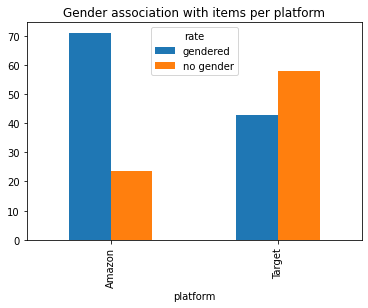

In [53]:
ax3 = table1.plot(x='platform', kind='bar', stacked=False, title='Gender association with items per platform')
#ax.figure.savefig('gender_platform.pdf')

In [94]:
platform_gender_count = df.groupby(['platform', 'gender'])['item'].count()
platform_gender_count = platform_gender_count.rename("count")
platform_gender_count = platform_gender_count.reset_index()
platform_gender_count

,platform,gender,count
0,Amazon,boy,46
1,Amazon,girl,60
2,Amazon,neutral,51
3,Target,boy,30
4,Target,girl,29
5,Target,neutral,108


In [56]:
platform_gender_count.groupby('platform')['count'].sum()

platform
Amazon    157
Target    167
Name: count, dtype: int64

In [57]:
table = pd.pivot_table(platform_gender_count, values='count', index=['platform'],columns=['gender'])
table=table.reset_index()

In [91]:
table

gender,platform,boy,girl,neutral
0,Amazon,46,60,51
1,Target,30,29,108


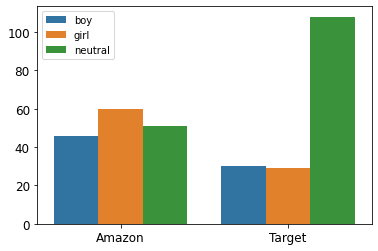

In [113]:
import seaborn as sns
ax = sns.barplot(x="platform", y="count", hue="gender", data=platform_gender_count)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=10)
ax.figure.savefig('SIGIR_gender_platform.pdf')

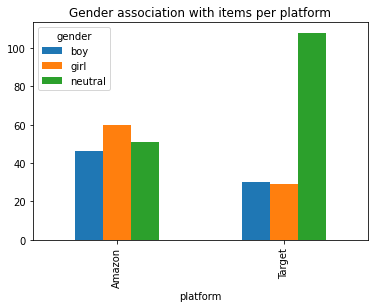

In [90]:
ax = table.plot(x='platform', kind='bar', stacked=False, title='Gender association with items per platform')
ax.set_xticklabels(table['platform'])
ax.figure.savefig('SIGIR_gender_platform.pdf')

In [60]:
list_table = pd.pivot_table(list_item, values='count_match', index=['platform'],columns=['gender'])
list_table = list_table.reset_index()
list_table

gender,platform,boy,girl
0,Amazon,0.31,0.34
1,Target,0.21,0.20


In [99]:
plt_list_item = list_item.dropna()

NameError: name 'x2' is not defined

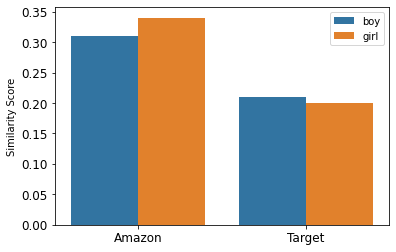

In [114]:
import seaborn as sns
ax = sns.barplot(x="platform", y="count_match", hue="gender", data=plt_list_item)
ax.set(xlabel=None)
ax.set(ylabel="Similarity Score")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=10)
for container in :
    ax.bar_label(container)
#ax.figure.savefig('SIGIR_gender_count.pdf')

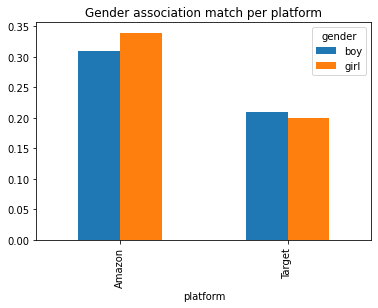

In [64]:
ax1 = list_table.plot(x='platform', kind='bar', stacked=False, title='Gender association match per platform')
ax1.figure.savefig('SIGIR_gender_count.pdf')